# HMI PINN

In [2]:
from setproctitle import setproctitle

setproctitle("HMI PINN")

In [3]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= "2"

import numpy as np 
import matplotlib.pyplot as plt
import torch
import time

In [4]:
path = 'NOAA11429_20120307_110000'

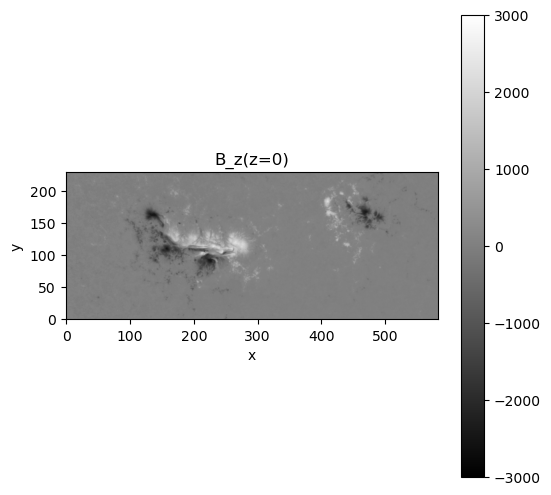

In [5]:
input_path = f'01_input/{path}/'
bottom_npy_path = os.path.join(input_path, 'b_bottom.npy')

with open(bottom_npy_path, 'rb') as f:
        b_bottom = np.load(f)

plt.close()
fig, ax = plt.subplots(figsize=(6,6))
CS = plt.imshow(b_bottom[:, :, 2].transpose(), origin='lower', cmap='gray', vmin=-3000, vmax=3000)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title("B_z(z=0)")
fig.colorbar(CS)
plt.show()

In [6]:
output_path = f'02_output/{path}/PINN'

Nx, Ny, _ = b_bottom.shape
Nz = 160

spatial_norm = 160
b_norm = 2500

In [13]:
total_iterations = 10000
log_interval = 1000

num_neurons = 256
num_layers = 8

w_ff = 1
w_div = 1
w_bc_init = 1000
decay_iterations = 25000

lr_init = 5e-4
lr_final = 5e-5
lr_decay_iterations = 50000

# batch_size = 10000
batch_size = 50000
num_worker = 2

In [14]:
from zpinn.pinn_nf2_old import NF2Trainer

In [15]:
trainer = NF2Trainer(output_path, b_bottom, Nz, spatial_norm, b_norm,
                     meta_info=None, dim=num_neurons,
                     positional_encoding=False,
                     use_potential_boundary=True, w_div=w_div, w_ff=w_ff,
                     decay_iterations=decay_iterations, meta_path=None,
                     use_vector_potential=False, work_directory=None)

Potential Boundary:   0%|          | 0/3 [00:00<?, ?it/s]

Potential Boundary: 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]


In [16]:
start = time.time()

trainer.train(total_iterations, batch_size, log_interval, log_interval, num_workers=num_worker)

runtime = time.time() - start
print(f'Runtime --> total: {runtime:.2f}sec ({(runtime/(total_iterations-1)*1000):.2f}ms/iter.)')

Training:   0%|          | 1/10000 [00:02<5:52:08,  2.11s/it]

[Iteration 000000/010000] [loss: 24.97767067] [loss_bc: 24.97766495; loss_div: 0.00000323; loss_ff: 0.00000241] [w_bc: 1000.000000, LR: 0.000500]


Training:   0%|          | 25/10000 [00:09<1:05:54,  2.52it/s]


KeyboardInterrupt: 

In [10]:
start = time.time()

trainer.train(total_iterations, batch_size, log_interval, log_interval, num_workers=num_worker)

runtime = time.time() - start
print(f'Runtime --> total: {runtime:.2f}sec ({(runtime/(total_iterations-1)*1000):.2f}ms/iter.)')

Training:   0%|          | 3/10000 [00:02<1:31:07,  1.83it/s]

[Iteration 000000/010000] [loss: 41.26448822] [loss_bc: 41.26446152; loss_div: 0.00002616; loss_ff: 0.00000092] [w_bc: 1000.000000, LR: 0.000500]


Training:  10%|█         | 1001/10000 [01:14<11:15, 13.32it/s]

[Iteration 001000/010000] [loss: 9.59786606] [loss_bc: 9.29465580; loss_div: 0.16845648; loss_ff: 0.13475455] [w_bc: 758.787207, LR: 0.000397]


Training:  20%|██        | 2001/10000 [02:26<10:23, 12.82it/s]

[Iteration 002000/010000] [loss: 4.87709999] [loss_bc: 4.63375902; loss_div: 0.13153429; loss_ff: 0.11180687] [w_bc: 575.598959, LR: 0.000316]


Training:  30%|███       | 3001/10000 [03:39<09:13, 12.63it/s]

[Iteration 003000/010000] [loss: 3.03898406] [loss_bc: 2.87346554; loss_div: 0.10195445; loss_ff: 0.06356417] [w_bc: 436.636463, LR: 0.000251]


Training:  40%|████      | 4001/10000 [04:52<07:35, 13.16it/s]

[Iteration 004000/010000] [loss: 1.89402676] [loss_bc: 1.78644013; loss_div: 0.07313070; loss_ff: 0.03445594] [w_bc: 331.222629, LR: 0.000199]


Training:  50%|█████     | 5001/10000 [06:05<06:32, 12.73it/s]

[Iteration 005000/010000] [loss: 1.43850756] [loss_bc: 1.36083269; loss_div: 0.05556830; loss_ff: 0.02210650] [w_bc: 251.258059, LR: 0.000158]


Training:  60%|██████    | 6001/10000 [07:19<05:09, 12.90it/s]

[Iteration 006000/010000] [loss: 0.94883662] [loss_bc: 0.89149964; loss_div: 0.04224131; loss_ff: 0.01509566] [w_bc: 190.598729, LR: 0.000126]


Training:  70%|███████   | 7001/10000 [08:32<03:55, 12.75it/s]

[Iteration 007000/010000] [loss: 0.74180174] [loss_bc: 0.69613308; loss_div: 0.03394183; loss_ff: 0.01172683] [w_bc: 144.583922, LR: 0.000100]


Training:  80%|████████  | 8001/10000 [09:45<02:36, 12.76it/s]

[Iteration 008000/010000] [loss: 0.54619527] [loss_bc: 0.51151073; loss_div: 0.02540236; loss_ff: 0.00928219] [w_bc: 109.678121, LR: 0.000079]


Training:  90%|█████████ | 9001/10000 [10:58<01:17, 12.94it/s]

[Iteration 009000/010000] [loss: 0.40135977] [loss_bc: 0.37549099; loss_div: 0.01892713; loss_ff: 0.00694166] [w_bc: 83.199363, LR: 0.000063]


Training: 100%|██████████| 10000/10000 [12:11<00:00, 13.67it/s]

[Iteration 010000/010000] [loss: 0.28275365] [loss_bc: 0.26224861; loss_div: 0.01441886; loss_ff: 0.00608618] [w_bc: 63.113171, LR: 0.000050]
[Iteration 010000/010000] [loss: 0.28275365] [loss_bc: 0.26217616; loss_div: 0.01441886; loss_ff: 0.00608618] [w_bc: 63.095734, LR: 0.000050]
Runtime --> total: 731.69sec (73.18ms/iter.)


In [11]:
with open(os.path.join(output_path, 'losses.npy'), "rb") as f:
    losses = np.load(f)

Text(0, 0.5, 'Loss')

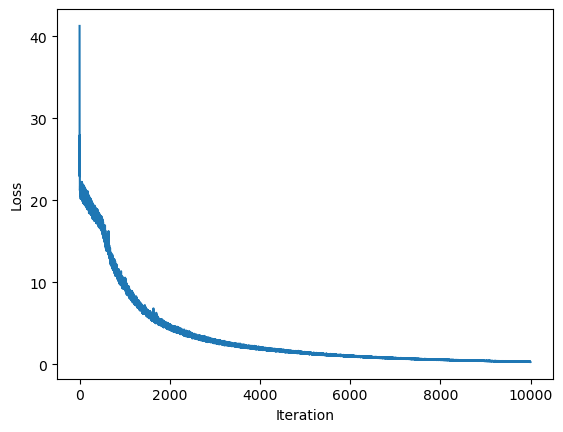

In [12]:
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')

In [13]:
with open(os.path.join(output_path, 'losses_no_weight.npy'), "rb") as f:
    losses_no_weight = np.load(f)

Text(0, 0.5, 'Loss (no weight)')

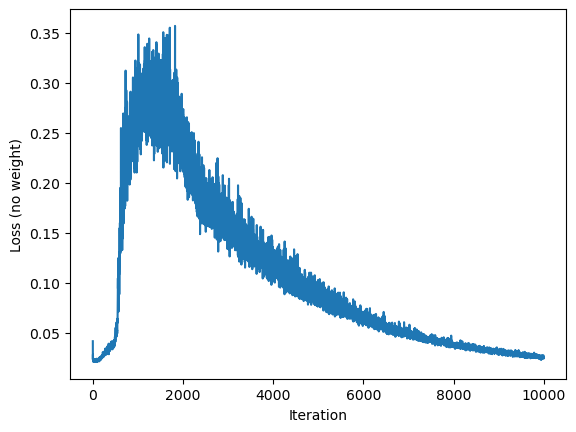

In [14]:
plt.plot(losses_no_weight)
plt.xlabel('Iteration')
plt.ylabel('Loss (no weight)')

In [15]:
from zpinn.pinn_nf2_visualization import pinn_cube

In [16]:
eval_path = f'03_eval/{path}/PINN'
os.makedirs(eval_path, exist_ok=True)

In [17]:
iterations = np.arange(0, total_iterations+1, log_interval)

for epo in iterations:
    save_path = os.path.join(output_path, 'model_%06d.pt' % epo)
    pinn = pinn_cube(save_path)
    pinn.calculate_magnetic_fields(batch_size=batch_size)
    vtk_paths = os.path.join(eval_path, f'B_pinn_{epo}.vtk')
    pinn.grid.save(vtk_paths)

100%|██████████| 2146/2146 [00:04<00:00, 499.69it/s]
